In [1]:
%matplotlib inline

# Función de activación - puerta logica XNOR

Intentemos replicar ahora el funcionamiento de una puerta lógica XNOR

In [53]:
import numpy as np

x1 = np.array([0.,  1.,  0.,  1.])
x2 = np.array([0.,  0.,  1.,  1.])
y = np.array([0.,  1.,  1.,  0.])

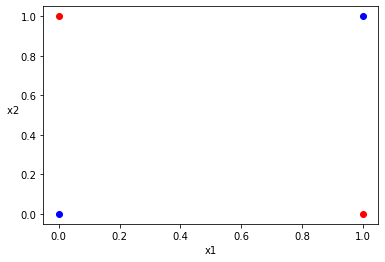

In [3]:
import matplotlib.pyplot as plt

plt.scatter(x1[0], x2[0], c='blue')
plt.scatter(x1[3], x2[3], c='blue')
plt.scatter(x1[1:3], x2[1:3], c='red')
plt.xlabel('x1')
plt.ylabel('x2  ', rotation=0)
plt.show()

Vamos a usar una neurona, igual que antes

![neurona_AND](Imagenes/red_neuronal_AND.png)

## Inicialización aleatoria de los parámetros

Inicializamos aleatoriamente los parámetros $\omega_0$, $\omega_1$ y $\omega_2$

In [4]:
import random

random.seed(45) # Esto es una semilla, cuando se generan números aleatorios, 
                # pero queremos que siempre se genere el mismo se suele fijar
                # un número llamado semilla. Esto hace que siempre a sea el mismo

w0 = random.random()
w1 = random.random()
w2 = random.random()

print(f'Los parámetros inicializados aleatoriamente son w0 = {w0:.4f}, w1 = {w1:.4f} y w2 = {w2:.4f}')

Los parámetros inicializados aleatoriamente son w0 = 0.2719, w1 = 0.4880 y w2 = 0.0819


Vamos a ver saldría con estos parámetros

In [5]:
z = w0 + w1*x1 + w2*x2

# Si el valor predicho es mayor que 0.5 se considera la salida un 1, si no un 0
z_bin = (z>0.5).astype(int)

print(f"z: {z}, z_bin: {z_bin}")
print(f"y: {y}")

z: [0.27187541 0.75990362 0.35375476 0.84178296], z_bin: [0 1 0 1]
y: [0. 1. 1. 0.]


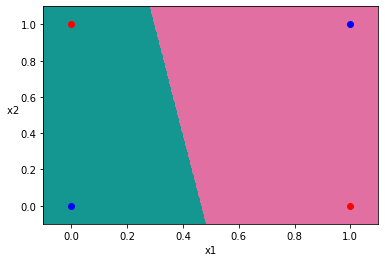

In [6]:
from matplotlib.colors import ListedColormap


# Se crean dos vectores con todos los posibles valores de entrada
max_axis = 1.1
min_axis = -0.1
axes = [min_axis, max_axis, min_axis, max_axis]
xx1, xx2 = np.meshgrid(
    np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
    np.linspace(axes[2], axes[3], 500).reshape(-1, 1),
)

# all_x1 y all_x2 son matrices de tamaño 500x500, se aplanan
X1_new = np.c_[xx1.ravel()]
X2_new = np.c_[xx2.ravel()]

# Se calculan las posibles salidas
all_z_predict = w0 + w1*X1_new + w2*X2_new

# Si el valor predicho es mayor que 0.5 se considera la salida un 1, si no un 0
all_z_predict = (all_z_predict>0.5).astype(int)

# z_predict es un array de 250000x1, se redimensiona en forma de matriz de 500x500
all_z_predict = all_z_predict.reshape(xx1.shape)

# Se dibujan las salidas predichas por la red de todas las posibles entradas creadas
colormap = ListedColormap(['#149691', '#e16fa2'])
plt.contourf(xx1, xx2, all_z_predict, cmap=colormap)

# Se representan los cuatro puntos de la salida de la puerta lógica
plt.scatter(x1[0], x2[0], c='blue')
plt.scatter(x1[3], x2[3], c='blue')
plt.scatter(x1[1:3], x2[1:3], c='red')

# Se termina de configurar la figura
plt.xlabel('x1')
plt.ylabel('x2  ', rotation=0)
plt.axis(axes)
plt.show()

No se asemeja en nada la salida de nuestra neurona con los puntos

## Cálculo del error o loss

Necesitamos una manera de saber cómo de bien o mal se comporta nuestra neurona, para ello, al igual que antes calcularemos el error mediante el error cuadrático medio (ECM) o mean squared error (MSE)

$$loss = \frac{\sum_{i=1}^{N} \left(z-y\right)^2}{N}$$

In [7]:
def loss(y, z):
    n = len(y)
    loss = np.sum((z-y) ** 2) / n
    return loss

In [8]:
error = loss(y, z)
error

0.31444849636999905

## Descenso del gradiente

Al igual que antes buscamos el mínimo de la función de pérdida mediante el descenso del gradiente, pero en este caso, como tenémos tres parámetros, tendremos que hacer el descenso mediante el gradiente de la función de error con respecto a $\omega_0$, $\omega_1$ y $\omega_2$

Como la función de pérdida era

$$loss = \frac{\sum_{i=1}^{N} \left(z-y\right)^2}{N}$$

Los dos gradientes se calculan mediante

$$\frac{\partial loss}{\partial \omega_0} = 
    \frac{\partial \left(\frac{\sum_{i=1}^{N} \left(z-y\right)^2}{N}\right)}{\partial \omega_0} = 
    \frac{\partial \left(\frac{\sum_{i=1}^{N} \left(\left(\omega_0+\omega_1x_1+\omega_2x_2\right)-y\right)^2}{N}\right)}{\partial \omega_0} = 
    \frac{2}{N}\sum_{i=1}^{N} {\left(\left(\omega_0+\omega_1x_1+\omega_2x_2\right)-y\right)} = 
    \frac{2}{N}\sum_{i=1}^{N} {\left(z-y\right)}$$

$$\frac{\partial loss}{\partial \omega_1} = 
    \frac{\partial \left(\frac{\sum_{i=1}^{N} \left(z-y\right)^2}{N}\right)}{\partial \omega_1} = 
    \frac{\partial \left(\frac{\sum_{i=1}^{N} \left(\left(\omega_0+\omega_1x_1+\omega_2x_2\right)-y\right)^2}{N}\right)}{\partial \omega_1} = 
    \frac{2}{N}\sum_{i=1}^{N} {\left(\left(\omega_0+\omega_1x_1+\omega_2x_2\right)-y\right) x_1} = 
    \frac{2}{N}\sum_{i=1}^{N} {\left(z-y\right) x_1}$$

$$\frac{\partial loss}{\partial \omega_2} = 
    \frac{\partial \left(\frac{\sum_{i=1}^{N} \left(z-y\right)^2}{N}\right)}{\partial \omega_2} = 
    \frac{\partial \left(\frac{\sum_{i=1}^{N} \left(\left(\omega_0+\omega_1x_1+\omega_2x_2\right)-y\right)^2}{N}\right)}{\partial \omega_2} = 
    \frac{2}{N}\sum_{i=1}^{N} {\left(\left(\omega_0+\omega_1x_1+\omega_2x_2\right)-y\right) x_2} = 
    \frac{2}{N}\sum_{i=1}^{N} {\left(z-y\right) x_2}$$

In [9]:
def gradiente_w0 (z, y):
    # Función que calcula el valor del gradiente de la función de pérdida con respecto w0 en un punto
    n = len(y)
    return 2*np.sum((z - y))/n

def gradiente_w1 (z, x1, y):
    # Función que calcula el valor del gradiente de la función de pérdida con respecto w1 en un punto
    n = len(y)
    return 2*np.sum((z - y)*x1)/n
    

def gradiente_w2 (z, x2, y):
    # Función que calcula el valor del gradiente de la función de pérdida con respecto w2 en un punto
    n = len(y)
    return 2*np.sum((z - y)*x2)/n

## Bucle de entrenamiento

Una vez que sabemos calcular los gradientes actualizamos los parámetros $\omega_0$, $\omega_1$ y $\omega_2$ mediante las siguientes fórmulas

$$\omega_0' = \omega_0 - \alpha\frac{\partial loss}{\partial \omega_0}$$

$$\omega_1' = \omega_1 - \alpha\frac{\partial loss}{\partial \omega_1}$$

$$\omega_2' = \omega_2 - \alpha\frac{\partial loss}{\partial \omega_2}$$

Recordemos que $\alpha$ es la tasa de aprendizaje o learning rate, que determina la velocidad a la que va a aprender la red

In [10]:
lr = 10**-1 # Tasa de aprendizaje o learning rate
steps = 90  # Numero de veces que se realiza el bucle de enrtenamiento

# Calculamos los valores que obtiene la red neuronal
z = w0 + w1*x1 + w2*x2

# Matrices donde se guardarán los pesos
Ws0 = np.empty(steps)
Ws1 = np.empty(steps)
Ws2 = np.empty(steps)

for i in range(steps):
    # Calculamos los gradientes
    dl_w0 = gradiente_w0(z, y)
    dl_w1 = gradiente_w1(z, x1, y)
    dl_w2 = gradiente_w2(z, x2, y)

    # Corregimos el valor de a y b
    w0 = w0 - lr*dl_w0
    w1 = w1 - lr*dl_w1
    w2 = w2 - lr*dl_w2

    # Calculamos los nuevos valores que obtiene la red neuronal
    z = w0 + w1*x1 + w2*x2

    # Obtenemos el error
    error = loss(y, z)

    # Guardamos los valores para luego ver la evolución del entrenamiento en una gráfica
    Ws0[i] = w0
    Ws1[i] = w1
    Ws2[i] = w2

    # Imprimimos la evolución del entrenamiento
    if (i+1)%10 == 0:
        print(f"i={i+1}: error={error:0.3f}, gradiente_w0={dl_w0:0.3f}, gradiente_w1={dl_w1:0.3f}, gradiente_w2={dl_w2:0.3f}, w0={w0:0.3f}, w1={w1:0.3f}, w2={w2:0.3f}")

i=10: error=0.275, gradiente_w0=-0.062, gradiente_w1=0.126, gradiente_w2=-0.002, w0=0.289, w1=0.302, w2=0.059
i=20: error=0.262, gradiente_w0=-0.050, gradiente_w1=0.081, gradiente_w2=0.004, w0=0.345, w1=0.203, w2=0.058
i=30: error=0.256, gradiente_w0=-0.036, gradiente_w1=0.054, gradiente_w2=0.008, w0=0.388, w1=0.138, w2=0.051
i=40: error=0.253, gradiente_w0=-0.026, gradiente_w1=0.036, gradiente_w2=0.009, w0=0.418, w1=0.095, w2=0.043
i=50: error=0.251, gradiente_w0=-0.019, gradiente_w1=0.024, gradiente_w2=0.008, w0=0.441, w1=0.066, w2=0.034
i=60: error=0.251, gradiente_w0=-0.014, gradiente_w1=0.017, gradiente_w2=0.007, w0=0.457, w1=0.046, w2=0.027
i=70: error=0.250, gradiente_w0=-0.010, gradiente_w1=0.012, gradiente_w2=0.006, w0=0.469, w1=0.032, w2=0.021
i=80: error=0.250, gradiente_w0=-0.007, gradiente_w1=0.008, gradiente_w2=0.004, w0=0.477, w1=0.023, w2=0.016
i=90: error=0.250, gradiente_w0=-0.005, gradiente_w1=0.006, gradiente_w2=0.003, w0=0.483, w1=0.016, w2=0.012


Vamos a ver cómo es la salida de nuestra neurona una vez la hemos entrenado

In [11]:
z = w0 + w1*x1 + w2*x2 
z_bin = (z>0.5).astype(int)

print(f"z: {z}, z_bin: {z_bin}")
print(f"y: {y}")

z: [0.4834088  0.49940442 0.49538827 0.5113839 ], z_bin: [0 0 0 1]
y: [0. 1. 1. 0.]


In [132]:
from matplotlib.animation import FuncAnimation

# Creamos la gráfica inicial
fig, ax = plt.subplots(1,1)
fig.set_tight_layout(True)
ax.set_xlabel('x1')
ax.set_ylabel('x2  ', rotation=0)

# Se dibujan los datos que persistiran en toda la evolución de la gráfica
ax.scatter(x1[0], x2[0], c='blue')
ax.scatter(x1[3], x2[3], c='blue')
ax.scatter(x1[1:3], x2[1:3], c='red')

# Se dibuja el el fondo que irán cambiando durante el entrenamiento
max_axis = 1.1
min_axis = -0.1
axes = [min_axis, max_axis, min_axis, max_axis]
xx1, xx2 = np.meshgrid(
    np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
    np.linspace(axes[2], axes[3], 500).reshape(-1, 1),
)
X1_new = np.c_[xx1.ravel()]
X2_new = np.c_[xx2.ravel()]
all_z_predict = w0 + w1*X1_new + w2*X2_new
all_z_predict = (all_z_predict>0.5).astype(int)
all_z_predict = all_z_predict.reshape(xx1.shape)
colormap = ListedColormap(['#149691', '#e16fa2'])
fondo = ax.contourf(xx1, xx2, all_z_predict, cmap=colormap)

# Se dibuja un título
fontsize = 12
titulo = fig.suptitle(f'step: {0}', fontsize=fontsize)

# Se define la función que va a modificar la gráfica con la evolución del entrenamiento
def update(i):
    # Se actualiza el fondo
    all_z_predict = Ws0[i] + Ws1[i]*X1_new + Ws2[i]*X2_new
    all_z_predict = (all_z_predict>0.5).astype(int)
    all_z_predict = all_z_predict.reshape(xx1.shape)
    ax.contourf(xx1, xx2, all_z_predict, cmap=colormap)
    ax.scatter(x1[0], x2[0], c='blue')
    ax.scatter(x1[3], x2[3], c='blue')
    ax.scatter(x1[1:3], x2[1:3], c='red')

    # Se actualiza el título
    titulo.set_text(f'step: {i}')

    return 0

# Se crea la animación con un refresco cada 200 ms
interval = 200 # ms
anim = FuncAnimation(fig, update, frames=np.arange(0, steps), interval=interval)

# Se guarda en un GIF
gif_name = "GIFs/entrenamiento__XNOR.gif"
anim.save(gif_name, dpi=80, writer='imagemagick')
plt.close()

MovieWriter imagemagick unavailable; using Pillow instead.


![gif_xnor](GIFs\entrenamiento__XNOR.gif)

Como se puede no hay manera de resolver esto con una sola neurona

# Red neuronal

Podemos estar tentados a resolver esto con tres neuronas, dos de entrada y una de salida. Ya que si una neurona establece una linea de división, con dos neuronas podemos establecer dos líneas de división. Y la tercera neurona a la salida, que determine si la salida tiene que ser 0 o 1

![red_neuronal_XNOR](Imagenes/red_neuronal_XNOR.png)

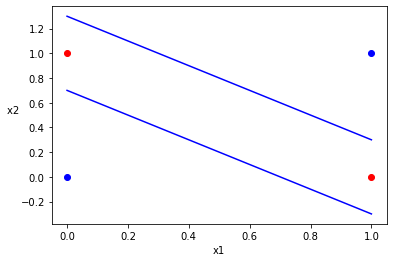

In [12]:
x = np.array([0, 1])
linea1 = 1.3 - 1*x
linea2 = 0.7 - 1*x

plt.scatter(x1[0], x2[0], c='blue')
plt.scatter(x1[3], x2[3], c='blue')
plt.scatter(x1[1:3], x2[1:3], c='red')
plt.plot(x, linea1, 'b')
plt.plot(x, linea2, 'b')
plt.xlabel('x1')
plt.ylabel('x2  ', rotation=0)
plt.show()

Vamos a implementar dicha red. Primero inicializamos aleatoriamente los pesos

In [13]:
import random

random.seed(45) # Esto es una semilla, cuando se generan números aleatorios, 
                # pero queremos que siempre se genere el mismo se suele fijar
                # un número llamado semilla. Esto hace que siempre a sea el mismo

w10 = random.random()
w11 = random.random()
w12 = random.random()

w20 = random.random()
w21 = random.random()
w22 = random.random()

w30 = random.random()
w31 = random.random()
w32 = random.random()

Vamos a ver qué saldría con estos parámetros

In [14]:
z1 = w10 + w11*x1 + w12*x2
z2 = w20 + w21*x1 + w22*x2
z = w30 + w31*z1 + w32*z2

# Si el valor predicho es mayor que 0.5 se considera la salida un 1, si no un 0
z_bin = (z>0.5).astype(int)

print(f"z: {z}, z_bin: {z_bin}")
print(f"y: {y}")

z: [0.42121083 0.50115337 0.43428128 0.51422382], z_bin: [0 1 0 1]
y: [0. 1. 1. 0.]


Text(0.5, 1.0, 'z3')

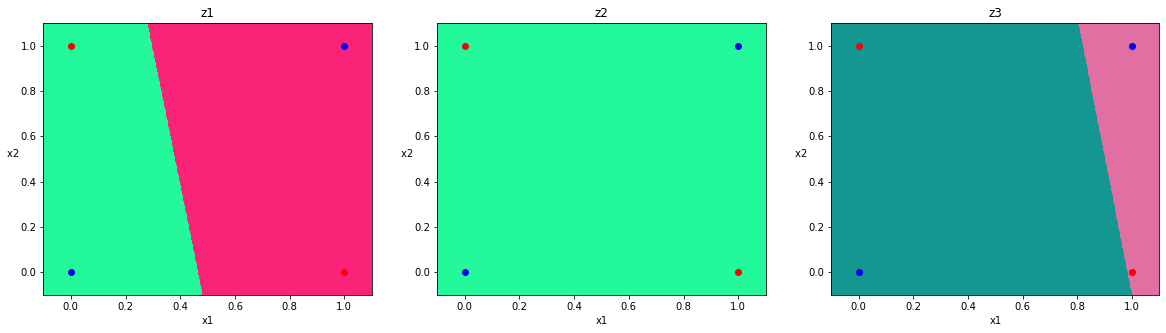

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,5))

# Se crean dos vectores con todos los posibles valores de entrada
max_axis = 1.1
min_axis = -0.1
axes = [min_axis, max_axis, min_axis, max_axis]
xx1, xx2 = np.meshgrid(
    np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
    np.linspace(axes[2], axes[3], 500).reshape(-1, 1),
)

# all_x1 y all_x2 son matrices de tamaño 500x500, se aplanan
X1_new = np.c_[xx1.ravel()]
X2_new = np.c_[xx2.ravel()]

# Se calculan las posibles salidas
z1 = w10 + w11*X1_new + w12*X2_new
z2 = w20 + w21*X1_new + w22*X2_new
all_z_predict = w30 + w31*z1 + w32*z2

# Si el valor predicho es mayor que 0.5 se considera la salida un 1, si no un 0
all_z_predict = (all_z_predict>0.5).astype(int)
z1 = (z1>0.5).astype(int)
z2 = (z2>0.5).astype(int)

# z_predict es un array de 250000x1, se redimensiona en forma de matriz de 500x500
all_z_predict = all_z_predict.reshape(xx1.shape)
z1 = z1.reshape(xx1.shape)
z2 = z2.reshape(xx1.shape)

# Se dibujan las salidas predichas por la red de todas las posibles entradas creadas
colormap1 = ListedColormap(['#23F99B', '#F92377'])
colormap2 = ListedColormap(['#149691', '#e16fa2'])
ax1.contourf(xx1, xx2, z1, cmap=colormap1)
ax2.contourf(xx1, xx2, z2, cmap=colormap1)
ax3.contourf(xx1, xx2, all_z_predict, cmap=colormap2)

# Se representan los cuatro puntos de la salida de la puerta lógica
ax1.scatter(x1[0], x2[0], c='blue')
ax1.scatter(x1[3], x2[3], c='blue')
ax1.scatter(x1[1:3], x2[1:3], c='red')
ax2.scatter(x1[0], x2[0], c='blue')
ax2.scatter(x1[3], x2[3], c='blue')
ax2.scatter(x1[1:3], x2[1:3], c='red')
ax3.scatter(x1[0], x2[0], c='blue')
ax3.scatter(x1[3], x2[3], c='blue')
ax3.scatter(x1[1:3], x2[1:3], c='red')

# Se termina de configurar la figura
ax1.set_xlabel('x1')
ax1.set_ylabel('x2  ', rotation=0)
ax1.set_title('z1')
ax2.set_xlabel('x1')
ax2.set_ylabel('x2  ', rotation=0)
ax2.set_title('z2')
ax3.set_xlabel('x1')
ax3.set_ylabel('x2  ', rotation=0)
ax3.set_title('z3')

No se asemeja en nada la salida de nuestra neurona con los puntos

## Cálculo del error o loss

Necesitamos una manera de saber cómo de bien o mal se comporta nuestra neurona, para ello, al igual que antes calcularemos el error mediante el error cuadrático medio (ECM) o mean squared error (MSE)

$$loss = \frac{\sum_{i=1}^{N} \left(z-y\right)^2}{N}$$

In [16]:
def loss(y, z):
    n = len(y)
    loss = np.sum((z-y) ** 2) / n
    return loss

In [17]:
error = loss(y, z)
error

0.2526825829808881

## Descenso del gradiente

Al igual que antes buscamos el mínimo de la función de pérdida mediante el descenso del gradiente, pero en este caso, como tenémos tres parámetros, tendremos que hacer el descenso mediante el gradiente de la función de error con respecto a $\omega_0$, $\omega_1$ y $\omega_2$

Como la función de pérdida era

$$loss = \frac{\sum_{i=1}^{N} \left(z-y\right)^2}{N}$$

Los dos gradientes se calculan mediante

**Calculo de las derivadas con respecto $\omega_{1x}$**

$$\frac{\partial loss}{\partial \omega_{10}} = 
    \frac{\partial \left(\frac{\sum_{i=1}^{N} \left(z-y\right)^2}{N}\right)}{\partial \omega_{10}} = 
    2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial \left(z-y\right)}{\partial \omega_{10}} = 
    2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial z}{\partial \omega_{10}} = $$
$$= 2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial \left(\omega_{30}+\omega_{31}z_1+\omega_{32}z_2\right)}{\partial \omega_{10}} = $$
$$= 2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\omega_{31}\frac{\partial z_1}{\partial \omega_{10}} = 
    2\omega_{31}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial \left(\omega_{10}+\omega_{11}x_1+\omega_{12}x_2\right)}{\partial \omega_{10}} = $$
$$= 2\omega_{31}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial \omega_{10}}{\partial \omega_{10}} = 
    2\omega_{31}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}$$

$$\frac{\partial loss}{\partial \omega_{11}} = 
    \frac{\partial \left(\frac{\sum_{i=1}^{N} \left(z-y\right)^2}{N}\right)}{\partial \omega_{11}} = 
    2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial \left(z-y\right)}{\partial \omega_{11}} = 
    2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial z}{\partial \omega_{11}} = $$
$$= 2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial \left(\omega_{30}+\omega_{31}z_1+\omega_{32}z_2\right)}{\partial \omega_{11}} = $$
$$= 2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\omega_{31}\frac{\partial z_1}{\partial \omega_{11}} = 
    2\omega_{31}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial \left(\omega_{10}+\omega_{11}x_1+\omega_{12}x_2\right)}{\partial \omega_{11}} = $$
$$= 2\omega_{31}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial \left(\omega_{11}x_1\right)}{\partial \omega_{11}} = 
    2\omega_{31}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}x_1$$

$$\frac{\partial loss}{\partial \omega_{12}} = 
    \frac{\partial \left(\frac{\sum_{i=1}^{N} \left(z-y\right)^2}{N}\right)}{\partial \omega_{12}} = 
    2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial \left(z-y\right)}{\partial \omega_{12}} = 
    2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial z}{\partial \omega_{12}} = $$
$$= 2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial \left(\omega_{30}+\omega_{31}z_1+\omega_{32}z_2\right)}{\partial \omega_{12}} = $$
$$= 2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\omega_{31}\frac{\partial z_1}{\partial \omega_{12}} = 
    2\omega_{31}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial \left(\omega_{10}+\omega_{11}x_1+\omega_{12}x_2\right)}{\partial \omega_{12}} = $$
$$= 2\omega_{31}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial \left(\omega_{12}x_2\right)}{\partial \omega_{12}} = 
    2\omega_{31}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}x_2$$




**Calculo de las derivadas con respecto $\omega_{2x}$**

$$\frac{\partial loss}{\partial \omega_{20}} = 
    \frac{\partial \left(\frac{\sum_{i=1}^{N} \left(z-y\right)^2}{N}\right)}{\partial \omega_{20}} = 
    2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial \left(z-y\right)}{\partial \omega_{20}} = 
    2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial z}{\partial \omega_{20}} = $$
$$= 2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial \left(\omega_{30}+\omega_{31}z_1+\omega_{32}z_2\right)}{\partial \omega_{20}} = $$
$$= 2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\omega_{32}\frac{\partial z_2}{\partial \omega_{20}} = 
    2\omega_{32}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial \left(\omega_{20}+\omega_{21}x_1+\omega_{22}x_2\right)}{\partial \omega_{20}} = $$
$$= 2\omega_{32}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial \omega_{20}}{\partial \omega_{20}} = 
    2\omega_{32}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}$$

$$\frac{\partial loss}{\partial \omega_{21}} = 
    \frac{\partial \left(\frac{\sum_{i=1}^{N} \left(z-y\right)^2}{N}\right)}{\partial \omega_{21}} = 
    2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial \left(z-y\right)}{\partial \omega_{21}} = 
    2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial z}{\partial \omega_{21}} = $$
$$= 2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial \left(\omega_{30}+\omega_{31}z_1+\omega_{32}z_2\right)}{\partial \omega_{21}} = $$
$$= 2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\omega_{32}\frac{\partial z_2}{\partial \omega_{21}} = 
    2\omega_{32}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial \left(\omega_{20}+\omega_{21}x_1+\omega_{22}x_2\right)}{\partial \omega_{21}} = $$
$$= 2\omega_{32}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial \left(\omega_{21}x_1\right)}{\partial \omega_{21}} = 
    2\omega_{32}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}x_1$$

$$\frac{\partial loss}{\partial \omega_{22}} = 
    \frac{\partial \left(\frac{\sum_{i=1}^{N} \left(z-y\right)^2}{N}\right)}{\partial \omega_{22}} = 
    2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial \left(z-y\right)}{\partial \omega_{22}} = 
    2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial z}{\partial \omega_{22}} = $$
$$= 2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial \left(\omega_{30}+\omega_{31}z_1+\omega_{32}z_2\right)}{\partial \omega_{22}} = $$
$$= 2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\omega_{32}\frac{\partial z_2}{\partial \omega_{22}} = 
    2\omega_{32}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial \left(\omega_{20}+\omega_{21}x_1+\omega_{22}x_2\right)}{\partial \omega_{22}} = $$
$$= 2\omega_{32}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial \left(\omega_{22}x_2\right)}{\partial \omega_{22}} = 
    2\omega_{32}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}x_2$$




**Calculo de las derivadas con respecto $\omega_{3x}$**

$$\frac{\partial loss}{\partial \omega_{30}} = 
    \frac{\partial \left(\frac{\sum_{i=1}^{N} \left(z-y\right)^2}{N}\right)}{\partial \omega_{30}} = 
    2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial \left(z-y\right)}{\partial \omega_{30}} = 
    2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial z}{\partial \omega_{30}} = $$
$$= 2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial \left(\omega_{30}+\omega_{31}z_1+\omega_{32}z_2\right)}{\partial \omega_{20}} = $$
$$= 2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial \omega_{30}}{\partial \omega_{30}} = 
    2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}$$

$$\frac{\partial loss}{\partial \omega_{31}} = 
    \frac{\partial \left(\frac{\sum_{i=1}^{N} \left(z-y\right)^2}{N}\right)}{\partial \omega_{31}} = 
    2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial \left(z-y\right)}{\partial \omega_{31}} = 
    2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial z}{\partial \omega_{31}} = $$
$$= 2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial \left(\omega_{30}+\omega_{31}z_1+\omega_{32}z_2\right)}{\partial \omega_{31}} = $$
$$= 2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial \left(\omega_{31}z_1\right)}{\partial \omega_{31}} = 
    2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}z_1 = 
    2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\left(\omega_{10}+\omega_{11}x_1+\omega_{12}x_2\right)$$

$$\frac{\partial loss}{\partial \omega_{32}} = 
    \frac{\partial \left(\frac{\sum_{i=1}^{N} \left(z-y\right)^2}{N}\right)}{\partial \omega_{32}} = 
    2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial \left(z-y\right)}{\partial \omega_{32}} = 
    2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial z}{\partial \omega_{32}} = $$
$$= 2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial \left(\omega_{30}+\omega_{31}z_1+\omega_{32}z_2\right)}{\partial \omega_{32}} = $$
$$= 2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial \left(\omega_{32}z_2\right)}{\partial \omega_{32}} = 
    2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}z_2 = 
    2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\left(\omega_{20}+\omega_{21}x_1+\omega_{22}x_2\right)$$

In [18]:
def gradiente_w10 (z, y, w31):
    # Función que calcula el valor del gradiente de la función de pérdida con respecto w10 en un punto
    n = len(y)
    return 2*w31*np.sum((z - y))/n

def gradiente_w11 (z, y, w31, x1):
    # Función que calcula el valor del gradiente de la función de pérdida con respecto w11 en un punto
    n = len(y)
    return 2*w31*np.sum((z - y)*x1)/n
    

def gradiente_w12 (z, y, w31, x2):
    # Función que calcula el valor del gradiente de la función de pérdida con respecto w12 en un punto
    n = len(y)
    return 2*w31*np.sum((z - y)*x2)/n



def gradiente_w20 (z, y, w32):
    # Función que calcula el valor del gradiente de la función de pérdida con respecto w20 en un punto
    n = len(y)
    return 2*w32*np.sum((z - y))/n

def gradiente_w21 (z, y, w32, x1):
    # Función que calcula el valor del gradiente de la función de pérdida con respecto w21 en un punto
    n = len(y)
    return 2*w32*np.sum((z - y)*x1)/n
    

def gradiente_w22 (z, y, w32, x2):
    # Función que calcula el valor del gradiente de la función de pérdida con respecto w22 en un punto
    n = len(y)
    return 2*w32*np.sum((z - y)*x2)/n



def gradiente_w30 (z, y):
    # Función que calcula el valor del gradiente de la función de pérdida con respecto w30 en un punto
    n = len(y)
    return 2*np.sum((z - y))/n

def gradiente_w31 (z, y, z1):
    # Función que calcula el valor del gradiente de la función de pérdida con respecto w31 en un punto
    n = len(y)
    return 2*np.sum((z - y)*z1)/n
    

def gradiente_w32 (z, y, z2):
    # Función que calcula el valor del gradiente de la función de pérdida con respecto w32 en un punto
    n = len(y)
    return 2*w32*np.sum((z - y)*z2)/n

## Bucle de entrenamiento

Una vez que sabemos calcular los gradientes actualizamos los parámetros $\omega_0$, $\omega_1$ y $\omega_2$ mediante las siguientes fórmulas

$$\omega_{10}' = \omega_{10} - \alpha\frac{\partial loss}{\partial \omega_{10}}$$
$$\omega_{11}' = \omega_{11} - \alpha\frac{\partial loss}{\partial \omega_{11}}$$
$$\omega_{12}' = \omega_{12} - \alpha\frac{\partial loss}{\partial \omega_{12}}$$

$$\omega_{20}' = \omega_{20} - \alpha\frac{\partial loss}{\partial \omega_{20}}$$
$$\omega_{21}' = \omega_{21} - \alpha\frac{\partial loss}{\partial \omega_{21}}$$
$$\omega_{22}' = \omega_{22} - \alpha\frac{\partial loss}{\partial \omega_{22}}$$

$$\omega_{30}' = \omega_{30} - \alpha\frac{\partial loss}{\partial \omega_{30}}$$
$$\omega_{31}' = \omega_{31} - \alpha\frac{\partial loss}{\partial \omega_{31}}$$
$$\omega_{32}' = \omega_{32} - \alpha\frac{\partial loss}{\partial \omega_{32}}$$

Recordemos que $\alpha$ es la tasa de aprendizaje o learning rate, que determina la velocidad a la que va a aprender la red

In [19]:
lr = 10**-1 # Tasa de aprendizaje o learning rate
steps = 30  # Numero de veces que se realiza el bucle de enrtenamiento

# Calculamos los valores que obtiene la red neuronal
z1 = w10 + w11*x1 + w12*x2
z2 = w20 + w21*x1 + w22*x2
z = w30 + w31*z1 + w32*z2

# Matrices donde se guardarán los pesos
Ws10 = np.empty(steps)
Ws11 = np.empty(steps)
Ws12 = np.empty(steps)
Ws20 = np.empty(steps)
Ws21 = np.empty(steps)
Ws22 = np.empty(steps)
Ws30 = np.empty(steps)
Ws31 = np.empty(steps)
Ws32 = np.empty(steps)

for i in range(steps):
    # Calculamos los gradientes
    dl_w10 = gradiente_w10(z, y, w31)
    dl_w11 = gradiente_w11(z, y, w31, x1)
    dl_w12 = gradiente_w12(z, y, w31, x2)
    dl_w20 = gradiente_w20(z, y, w32)
    dl_w21 = gradiente_w21(z, y, w32, x1)
    dl_w22 = gradiente_w22(z, y, w32, x2)
    dl_w30 = gradiente_w30(z, y)
    dl_w31 = gradiente_w31(z, y, z1)
    dl_w32 = gradiente_w32(z, y, z2)

    # Corregimos el valor de a y b
    w10 = w10 - lr*dl_w10
    w11 = w11 - lr*dl_w11
    w12 = w12 - lr*dl_w12
    w20 = w20 - lr*dl_w20
    w21 = w21 - lr*dl_w21
    w22 = w22 - lr*dl_w22
    w30 = w30 - lr*dl_w30
    w31 = w31 - lr*dl_w31
    w32 = w32 - lr*dl_w32

    # Calculamos los nuevos valores que obtiene la red neuronal
    z1 = w10 + w11*x1 + w12*x2
    z2 = w20 + w21*x1 + w22*x2
    z = w30 + w31*z1 + w32*z2

    # Obtenemos el error
    error = loss(y, z)

    # Guardamos los valores para luego ver la evolución del entrenamiento en una gráfica
    Ws10[i] = w10
    Ws11[i] = w11
    Ws12[i] = w12
    Ws20[i] = w20
    Ws21[i] = w21
    Ws22[i] = w22
    Ws30[i] = w30
    Ws31[i] = w31
    Ws32[i] = w32

    # Imprimimos la evolución del entrenamiento
    if (i+1)%5 == 0:
        print(f"i={i+1}: error={error:0.3f}, w10={w10:0.3f}, w11={w11:0.3f}, w12={w12:0.3f}, w20={w20:0.3f}, w21={w21:0.3f}, w22={w22:0.3f}, w30={w10:0.3f}, w31={w31:0.3f}, w32={w32:0.3f}")

i=5: error=0.252, w10=0.274, w11=0.487, w12=0.083, w20=0.345, w21=0.069, w22=0.013, w30=0.274, w31=0.119, w32=0.313
i=10: error=0.251, w10=0.275, w11=0.485, w12=0.083, w20=0.347, w21=0.064, w22=0.013, w30=0.275, w31=0.113, w32=0.313
i=15: error=0.251, w10=0.276, w11=0.483, w12=0.083, w20=0.349, w21=0.059, w22=0.013, w30=0.276, w31=0.106, w32=0.314
i=20: error=0.251, w10=0.276, w11=0.482, w12=0.082, w20=0.350, w21=0.055, w22=0.012, w30=0.276, w31=0.100, w32=0.314
i=25: error=0.251, w10=0.276, w11=0.480, w12=0.082, w20=0.351, w21=0.050, w22=0.012, w30=0.276, w31=0.095, w32=0.314
i=30: error=0.251, w10=0.277, w11=0.479, w12=0.082, w20=0.352, w21=0.046, w22=0.012, w30=0.277, w31=0.089, w32=0.314


Vamos a ver cómo es la salida de nuestra neurona una vez la hemos entrenado

In [20]:
z1 = w10 + w11*x1 + w12*x2
z2 = w20 + w21*x1 + w22*x2
z = w30 + w31*z1 + w32*z2

# Si el valor predicho es mayor que 0.5 se considera la salida un 1, si no un 0
z_bin = (z>0.5).astype(int)

print(f"z: {z}, z_bin: {z_bin}")
print(f"y: {y}")

z: [0.46247378 0.51965283 0.47352123 0.53070028], z_bin: [0 1 0 1]
y: [0. 1. 1. 0.]


Text(0.5, 1.0, 'z3')

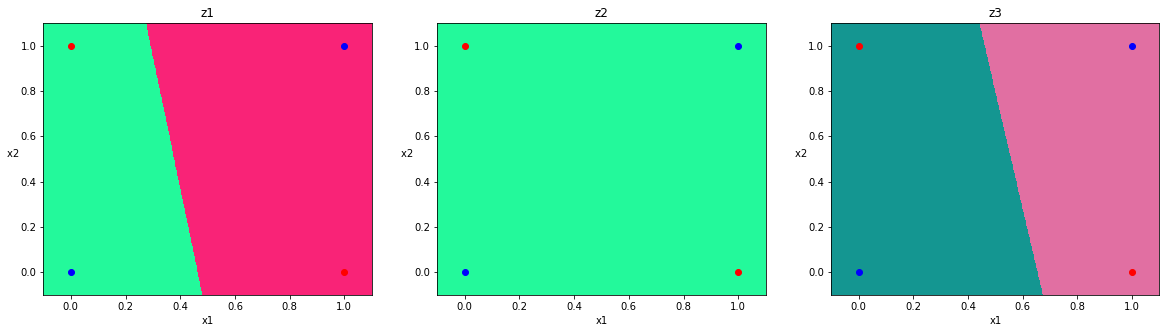

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,5))

# Se crean dos vectores con todos los posibles valores de entrada
max_axis = 1.1
min_axis = -0.1
axes = [min_axis, max_axis, min_axis, max_axis]
xx1, xx2 = np.meshgrid(
    np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
    np.linspace(axes[2], axes[3], 500).reshape(-1, 1),
)

# all_x1 y all_x2 son matrices de tamaño 500x500, se aplanan
X1_new = np.c_[xx1.ravel()]
X2_new = np.c_[xx2.ravel()]

# Se calculan las posibles salidas
z1 = w10 + w11*X1_new + w12*X2_new
z2 = w20 + w21*X1_new + w22*X2_new
all_z_predict = w30 + w31*z1 + w32*z2

# Si el valor predicho es mayor que 0.5 se considera la salida un 1, si no un 0
all_z_predict = (all_z_predict>0.5).astype(int)
z1 = (z1>0.5).astype(int)
z2 = (z2>0.5).astype(int)

# z_predict es un array de 250000x1, se redimensiona en forma de matriz de 500x500
all_z_predict = all_z_predict.reshape(xx1.shape)
z1 = z1.reshape(xx1.shape)
z2 = z2.reshape(xx1.shape)

# Se dibujan las salidas predichas por la red de todas las posibles entradas creadas
colormap1 = ListedColormap(['#23F99B', '#F92377'])
colormap2 = ListedColormap(['#149691', '#e16fa2'])
ax1.contourf(xx1, xx2, z1, cmap=colormap1)
ax2.contourf(xx1, xx2, z2, cmap=colormap1)
ax3.contourf(xx1, xx2, all_z_predict, cmap=colormap2)

# Se representan los cuatro puntos de la salida de la puerta lógica
ax1.scatter(x1[0], x2[0], c='blue')
ax1.scatter(x1[3], x2[3], c='blue')
ax1.scatter(x1[1:3], x2[1:3], c='red')
ax2.scatter(x1[0], x2[0], c='blue')
ax2.scatter(x1[3], x2[3], c='blue')
ax2.scatter(x1[1:3], x2[1:3], c='red')
ax3.scatter(x1[0], x2[0], c='blue')
ax3.scatter(x1[3], x2[3], c='blue')
ax3.scatter(x1[1:3], x2[1:3], c='red')

# Se termina de configurar la figura
ax1.set_xlabel('x1')
ax1.set_ylabel('x2  ', rotation=0)
ax1.set_title('z1')
ax2.set_xlabel('x1')
ax2.set_ylabel('x2  ', rotation=0)
ax2.set_title('z2')
ax3.set_xlabel('x1')
ax3.set_ylabel('x2  ', rotation=0)
ax3.set_title('z3')

In [22]:
from matplotlib.animation import FuncAnimation

# Creamos la gráfica inicial
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,5))
fig.set_tight_layout(True)
ax1.set_xlabel('x1')
ax1.set_ylabel('x2  ', rotation=0)
ax1.set_title('z1')
ax2.set_xlabel('x1')
ax2.set_ylabel('x2  ', rotation=0)
ax2.set_title('z2')
ax3.set_xlabel('x1')
ax3.set_ylabel('x2  ', rotation=0)
ax3.set_title('z3')

# Se dibujan los datos que persistiran en toda la evolución de la gráfica
ax1.scatter(x1[0], x2[0], c='blue')
ax1.scatter(x1[3], x2[3], c='blue')
ax1.scatter(x1[1:3], x2[1:3], c='red')
ax2.scatter(x1[0], x2[0], c='blue')
ax2.scatter(x1[3], x2[3], c='blue')
ax2.scatter(x1[1:3], x2[1:3], c='red')
ax3.scatter(x1[0], x2[0], c='blue')
ax3.scatter(x1[3], x2[3], c='blue')
ax3.scatter(x1[1:3], x2[1:3], c='red')

# Se dibuja el el fondo que irán cambiando durante el entrenamiento
max_axis = 1.1
min_axis = -0.1
axes = [min_axis, max_axis, min_axis, max_axis]
xx1, xx2 = np.meshgrid(
    np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
    np.linspace(axes[2], axes[3], 500).reshape(-1, 1),
)
X1_new = np.c_[xx1.ravel()]
X2_new = np.c_[xx2.ravel()]
all_z1_predict = w10 + w11*X1_new + w12*X2_new
all_z2_predict = w20 + w21*X1_new + w22*X2_new
all_z_predict = w30 + w31*all_z1_predict + w32*all_z2_predict

# Si el valor predicho es mayor que 0.5 se considera la salida un 1, si no un 0
all_z1_predict = (all_z1_predict>0.5).astype(int)
all_z2_predict = (all_z2_predict>0.5).astype(int)
all_z_predict = (all_z_predict>0.5).astype(int)

# z_predict es un array de 250000x1, se redimensiona en forma de matriz de 500x500
all_z1_predict = all_z1_predict.reshape(xx1.shape)
all_z2_predict = all_z2_predict.reshape(xx1.shape)
all_z_predict = all_z_predict.reshape(xx1.shape)

# Se dibujan las salidas predichas por la red de todas las posibles entradas creadas
colormap1 = ListedColormap(['#23F99B', '#F92377'])
colormap2 = ListedColormap(['#149691', '#e16fa2'])
fondo1 = ax1.contourf(xx1, xx2, all_z1_predict, cmap=colormap1)
fondo2 = ax2.contourf(xx1, xx2, all_z2_predict, cmap=colormap1)
fondo3 = ax3.contourf(xx1, xx2, all_z_predict, cmap=colormap2)

# Se dibuja un título
fontsize = 12
titulo = fig.suptitle(f'step: {0}', fontsize=fontsize)

# Se define la función que va a modificar la gráfica con la evolución del entrenamiento
def update(i):
    # Se actualiza el fondo
    all_z1_predict = Ws10[i] + Ws11[i]*X1_new + Ws12[i]*X2_new
    all_z2_predict = Ws20[i] + Ws21[i]*X1_new + Ws22[i]*X2_new
    all_z_predict = Ws30[i] + Ws31[i]*all_z1_predict + Ws32[i]*all_z2_predict

    all_z1_predict = (all_z1_predict>0.5).astype(int)
    all_z2_predict = (all_z2_predict>0.5).astype(int)
    all_z_predict = (all_z_predict>0.5).astype(int)

    all_z1_predict = all_z1_predict.reshape(xx1.shape)
    all_z2_predict = all_z2_predict.reshape(xx1.shape)
    all_z_predict = all_z_predict.reshape(xx1.shape)

    ax1.contourf(xx1, xx2, all_z1_predict, cmap=colormap1)
    ax2.contourf(xx1, xx2, all_z2_predict, cmap=colormap1)    
    ax3.contourf(xx1, xx2, all_z_predict, cmap=colormap2)

    ax1.scatter(x1[0], x2[0], c='blue')
    ax1.scatter(x1[3], x2[3], c='blue')
    ax1.scatter(x1[1:3], x2[1:3], c='red')
    ax2.scatter(x1[0], x2[0], c='blue')
    ax2.scatter(x1[3], x2[3], c='blue')
    ax2.scatter(x1[1:3], x2[1:3], c='red')
    ax3.scatter(x1[0], x2[0], c='blue')
    ax3.scatter(x1[3], x2[3], c='blue')
    ax3.scatter(x1[1:3], x2[1:3], c='red')

    # Se actualiza el título
    titulo.set_text(f'step: {i}')

    return 0

# Se crea la animación con un refresco cada 200 ms
interval = 200 # ms
anim = FuncAnimation(fig, update, frames=np.arange(0, steps), interval=interval)

# Se guarda en un GIF
gif_name = "GIFs/entrenamiento_red_XNOR.gif"
anim.save(gif_name, dpi=80, writer='imagemagick')
plt.close()

MovieWriter imagemagick unavailable; using Pillow instead.


![gif_xnor](GIFs\entrenamiento_red_XNOR.gif)

Sigue sin poderse solucionar con una red neuronal, vamos a ver por qué

Primero vemos cómo son $z_1$, $z_2$ y $z$

$$ z_1 = \omega_{10}+\omega_{11}x_1+\omega_{12}x_2 $$

$$ z_2 = \omega_{20}+\omega_{21}x_1+\omega_{22}x_2 $$

$$ z = \omega_{30}+\omega_{31}z_1+\omega_{32}z_2 $$

Ahora desarrollamos $z$, con $z_1$ y $z_2$

$$ z_1 = \omega_{10}+\omega_{11}x_1+\omega_{12}x_2 $$

$$ z_2 = \omega_{20}+\omega_{21}x_1+\omega_{22}x_2 $$

$$ z = \omega_{30}+\omega_{31}\left(\omega_{10}+\omega_{11}x_1+\omega_{12}x_2\right)+\omega_{32}\left(\omega_{20}+\omega_{21}x_1+\omega_{22}x_2\right) = $$
$$ = \omega_{30}+\omega_{31}\omega_{10}+\omega_{31}\omega_{11}x_1+\omega_{31}\omega_{12}x_2+\omega_{32}\omega_{20}+\omega_{32}\omega_{21}x_1+\omega_{32}\omega_{22}x_2 = $$
$$ = \left(\omega_{30}+\omega_{31}\omega_{10}+\omega_{32}\omega_{20}\right) + \left(\omega_{31}\omega_{11}+\omega_{32}\omega_{21}\right)x_1 + \left(\omega_{31}\omega_{12}+\omega_{32}\omega_{22}\right)x_2 = $$
$$ = \Omega_{0} + \Omega_{1}x_1 + \Omega_{2}x_2 = $$

Como se puede ver, se añadan las neuronas que se añadan, al final siempre tendremos el equivalente a una sola neurona, por lo que es necesario añadir algún mecanismo que evite esto. Ese mecanismo son las funciones de activación

# Función de activación

Para evitar que pase lo anterior a cada neurona se le añade una función a la salida que se denomina función de activación

![perceptron](Imagenes/Perceptron.PNG)

Gracias a esa función de activación podemos romprer la linealidad que hacía que la red de antes se comportara como una sola neurona, con lo que ahora podemos crear redes con varias neuronas consiguiendo resultados para problemas cada vez más complejos

Hay muchas funciones de activación y más adelante las veremos. De momento, para este ejemplo usaremos la función sigmoide

![sigmoide](Imagenes/sigmoid.png)

Esta función hace que si la entrada tiene valores muy altos o muy bajos, a la salida tengamos un 1 o un 0, mientras que si a la entrada tenemos valores muy pequeños tanto positivos como negativos, la salida no esté muy bien determinada

Con esto ya hemos aprendido todo lo que tiene una neurona básica en una red neuronal, que es la suma ponderada de todas las entradas ($\sum_{i=1}^{N} {\omega_ix_i}$), más un término independiente o bias ($\omega_0$). Todo eso determina el valor $z_i$, que es pasado por una función de activación ($\sigma = f\left(z_i\right)$).

A este modelo de neurona básica se le conoce como **perceptron**

Una vez hemos definido nuestro perceptron, ya podemos volver a crear la red neuronal con este

![red neuronal con función de activación](Imagenes/red_neuronal_activacion_XNOR.png)

$$z_1 = \omega_{10}+\omega_{11}x_1+\omega_{12}x_2$$
$$\sigma_1 = \frac{1}{1+e^{-z_1}} = \frac{1}{1+e^{-\omega_{10}-\omega_{11}x_1-\omega_{12}x_2}}$$
$$z_2 = \omega_{20}+\omega_{21}x_1+\omega_{22}x_2$$
$$\sigma_2 = \frac{1}{1+e^{-z_2}} = \frac{1}{1+e^{-\omega_{20}-\omega_{21}x_1-\omega_{22}x_2}}$$
$$z = \omega_{30}+\omega_{31}\sigma_1+\omega_{32}\sigma_2$$

Vamos a implementar dicha red. Primero inicializamos aleatoriamente los pesos

In [54]:
import random

random.seed(45) # Esto es una semilla, cuando se generan números aleatorios, 
                # pero queremos que siempre se genere el mismo se suele fijar
                # un número llamado semilla. Esto hace que siempre a sea el mismo

w10 = random.random()
w11 = random.random()
w12 = random.random()

w20 = random.random()
w21 = random.random()
w22 = random.random()

w30 = random.random()
w31 = random.random()
w32 = random.random()

Vamos a ver qué saldría con estos parámetros

In [55]:
def sigmoid(x):
    # Función que calcula salida de la función sigmoide de x
    return 1/(1+np.exp(-x))

In [56]:
z1 = w10 + w11*x1 + w12*x2
sigma1 = sigmoid(z1)
z2 = w20 + w21*x1 + w22*x2
sigma2 = sigmoid(z2)
z = w30 + w31*sigma1 + w32*sigma2

# Si el valor predicho es mayor que 0.5 se considera la salida un 1, si no un 0
z_bin = (z>0.5).astype(int)

print(f"z: {z}, z_bin: {z_bin}")
print(f"y: {y}")

z: [0.53226481 0.55108839 0.53544919 0.55397117], z_bin: [1 1 1 1]
y: [0. 1. 1. 0.]


Text(0.5, 1.0, 'z3')

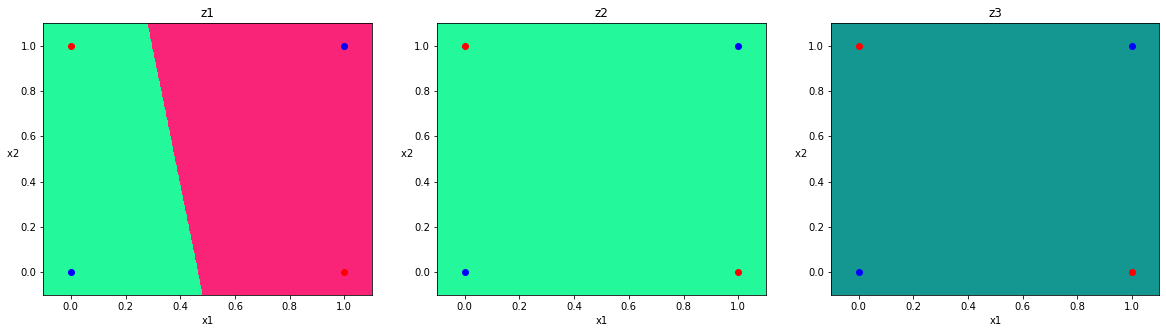

In [57]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,5))

# Se crean dos vectores con todos los posibles valores de entrada
max_axis = 1.1
min_axis = -0.1
axes = [min_axis, max_axis, min_axis, max_axis]
xx1, xx2 = np.meshgrid(
    np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
    np.linspace(axes[2], axes[3], 500).reshape(-1, 1),
)

# all_x1 y all_x2 son matrices de tamaño 500x500, se aplanan
X1_new = np.c_[xx1.ravel()]
X2_new = np.c_[xx2.ravel()]

# Se calculan las posibles salidas
z1 = w10 + w11*X1_new + w12*X2_new
sigma1 = sigmoid(z1)
z2 = w20 + w21*X1_new + w22*X2_new
sigma2 = sigmoid(z2)
all_z_predict = w30 + w31*sigma1 + w32*sigma2

# Si el valor predicho es mayor que 0.5 se considera la salida un 1, si no un 0
all_z_predict = (all_z_predict>0.5).astype(int)
z1 = (z1>0.5).astype(int)
z2 = (z2>0.5).astype(int)

# z_predict es un array de 250000x1, se redimensiona en forma de matriz de 500x500
all_z_predict = all_z_predict.reshape(xx1.shape)
z1 = z1.reshape(xx1.shape)
z2 = z2.reshape(xx1.shape)

# Se dibujan las salidas predichas por la red de todas las posibles entradas creadas
colormap1 = ListedColormap(['#23F99B', '#F92377'])
colormap2 = ListedColormap(['#149691', '#e16fa2'])
ax1.contourf(xx1, xx2, z1, cmap=colormap1)
ax2.contourf(xx1, xx2, z2, cmap=colormap1)
ax3.contourf(xx1, xx2, all_z_predict, cmap=colormap2)

# Se representan los cuatro puntos de la salida de la puerta lógica
ax1.scatter(x1[0], x2[0], c='blue')
ax1.scatter(x1[3], x2[3], c='blue')
ax1.scatter(x1[1:3], x2[1:3], c='red')
ax2.scatter(x1[0], x2[0], c='blue')
ax2.scatter(x1[3], x2[3], c='blue')
ax2.scatter(x1[1:3], x2[1:3], c='red')
ax3.scatter(x1[0], x2[0], c='blue')
ax3.scatter(x1[3], x2[3], c='blue')
ax3.scatter(x1[1:3], x2[1:3], c='red')

# Se termina de configurar la figura
ax1.set_xlabel('x1')
ax1.set_ylabel('x2  ', rotation=0)
ax1.set_title('z1')
ax2.set_xlabel('x1')
ax2.set_ylabel('x2  ', rotation=0)
ax2.set_title('z2')
ax3.set_xlabel('x1')
ax3.set_ylabel('x2  ', rotation=0)
ax3.set_title('z3')

No se asemeja en nada la salida de nuestra red con los puntos. Tenemos que entrenar

## Cálculo del error o loss

Necesitamos una manera de saber cómo de bien o mal se comporta nuestra neurona, para ello, al igual que antes calcularemos el error mediante el error cuadrático medio (ECM) o mean squared error (MSE)

$$loss = \frac{\sum_{i=1}^{N} \left(z-y\right)^2}{N}$$

In [58]:
def loss(y, z):
    n = len(y)
    loss = np.sum((z-y) ** 2) / n
    return loss

In [59]:
error = loss(y, z)
error

0.251879742527086

## Descenso del gradiente

Al igual que antes buscamos el mínimo de la función de pérdida mediante el descenso del gradiente, pero en este caso, como tenémos tres parámetros, tendremos que hacer el descenso mediante el gradiente de la función de error con respecto a $\omega_0$, $\omega_1$ y $\omega_2$

Como la función de pérdida era

$$loss = \frac{\sum_{i=1}^{N} \left(z-y\right)^2}{N}$$

Los dos gradientes se calculan mediante

**Calculo de las derivadas con respecto $\omega_{1x}$**

$$\frac{\partial loss}{\partial \omega_{10}} = 
    \frac{\partial \left(\frac{\sum_{i=1}^{N} \left(z-y\right)^2}{N}\right)}{\partial \omega_{10}} = 
    2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial \left(z-y\right)}{\partial \omega_{10}} = 
    2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial z}{\partial \omega_{10}} = 
    2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial \left(\omega_{30}+\omega_{31}\sigma_1+\omega_{32}\sigma_2\right)}{\partial \omega_{10}} = $$
$$= 2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\omega_{31}\frac{\partial \sigma_1}{\partial \omega_{10}} = 
    2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\omega_{31}\frac{\partial \left(\frac{1}{1+e^{-z_1}}\right)}{\partial \omega_{10}} = $$
$$= 2\omega_{31}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial \left(\frac{1}{1+e^{-z_1}}\right)}{\partial \omega_{10}} = 
    2\omega_{31}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\frac{\partial 1}{\partial \omega_{10}}\left(1+e^{-z_1}\right)-1\frac{\partial \left(1+e^{-z_1}\right)}{\partial \omega_{10}}}{\left(1+e^{-z_1}\right)^2} = $$
$$= 2\omega_{31}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{0-\frac{\partial \left(1+e^{-z_1}\right)}{\partial \omega_{10}}}{\left(1+e^{-z_1}\right)^2} = 
    -2\omega_{31}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\frac{\partial \left(1+e^{-z_1}\right)}{\partial \omega_{10}}}{\left(1+e^{-z_1}\right)^2} = $$
$$= -2\omega_{31}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\frac{\partial 1}{\partial \omega_{10}}+\frac{\partial e^{-z_1}}{\partial \omega_{10}}}{\left(1+e^{-z_1}\right)^2} = 
    -2\omega_{31}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{0+\frac{\partial e^{-z_1}}{\partial \omega_{10}}}{\left(1+e^{-z_1}\right)^2} = $$
$$= -2\omega_{31}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\frac{\partial e^{-z_1}}{\partial \omega_{10}}}{\left(1+e^{-z_1}\right)^2} = 
    2\omega_{31}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{e^{-z_1}}{\left(1+e^{-z_1}\right)^2}\frac{\partial z_1}{\partial \omega_{10}} = $$
$$= 2\omega_{31}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{1}{1+e^{-z_1}}\left[\frac{e^{-z_1}}{1+e^{-z_1}}\right]\frac{\partial z_1}{\partial \omega_{10}} = 
    2\omega_{31}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{1}{1+e^{-z_1}}\left[\frac{1+e^{-z_1}-1}{1+e^{-z_1}}\right]\frac{\partial z_1}{\partial \omega_{10}} = $$
$$= 2\omega_{31}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{1}{1+e^{-z_1}}\left[\frac{1+e^{-z_1}}{1+e^{-z_1}}-\frac{1}{1+e^{-z_1}}\right]\frac{\partial z_1}{\partial \omega_{10}} = 
    2\omega_{31}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{1}{1+e^{-z_1}}\left[1-\frac{1}{1+e^{-z_1}}\right]\frac{\partial z_1}{\partial \omega_{10}} = $$
$$= 2\omega_{31}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\sigma\left(z_1\right)\left[1-\sigma\left(z_1\right)\right]\frac{\partial z_1}{\partial \omega_{10}} = $$
$$= 2\omega_{31}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\sigma\left(z_1\right)\left[1-\sigma\left(z_1\right)\right]\frac{\partial \left(\omega_{10}+\omega_{11}x_1+\omega_{12}x_2\right)}{\partial \omega_{10}} = 
    2\omega_{31}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\sigma\left(z_1\right)\left[1-\sigma\left(z_1\right)\right] = $$

 
 
$$\frac{\partial loss}{\partial \omega_{11}} = 
    \frac{\partial \left(\frac{\sum_{i=1}^{N} \left(z-y\right)^2}{N}\right)}{\partial \omega_{11}} = 
    2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial \left(z-y\right)}{\partial \omega_{11}} = 
    2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial z}{\partial \omega_{11}} = 
    2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial \left(\omega_{30}+\omega_{31}\sigma_1+\omega_{32}\sigma_2\right)}{\partial \omega_{11}} = $$
$$= 2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\omega_{31}\frac{\partial \sigma_1}{\partial \omega_{11}} = 
    2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\omega_{31}\frac{\partial \left(\frac{1}{1+e^{-z_1}}\right)}{\partial \omega_{11}} = $$
$$= 2\omega_{31}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial \left(\frac{1}{1+e^{-z_1}}\right)}{\partial \omega_{11}} = 
    2\omega_{31}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\frac{\partial 1}{\partial \omega_{11}}\left(1+e^{-z_1}\right)-1\frac{\partial \left(1+e^{-z_1}\right)}{\partial \omega_{11}}}{\left(1+e^{-z_1}\right)^2} = $$
$$= 2\omega_{31}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{0-\frac{\partial \left(1+e^{-z_1}\right)}{\partial \omega_{11}}}{\left(1+e^{-z_1}\right)^2} = 
    -2\omega_{31}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\frac{\partial \left(1+e^{-z_1}\right)}{\partial \omega_{11}}}{\left(1+e^{-z_1}\right)^2} = $$
$$= -2\omega_{31}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\frac{\partial 1}{\partial \omega_{11}}+\frac{\partial e^{-z_1}}{\partial \omega_{11}}}{\left(1+e^{-z_1}\right)^2} = 
    -2\omega_{31}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{0+\frac{\partial e^{-z_1}}{\partial \omega_{11}}}{\left(1+e^{-z_1}\right)^2} = $$
$$= -2\omega_{31}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\frac{\partial e^{-z_1}}{\partial \omega_{11}}}{\left(1+e^{-z_1}\right)^2} = 
    2\omega_{31}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{e^{-z_1}}{\left(1+e^{-z_1}\right)^2}\frac{\partial z_1}{\partial \omega_{11}} = $$
$$= 2\omega_{31}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{1}{1+e^{-z_1}}\left[\frac{e^{-z_1}}{1+e^{-z_1}}\right]\frac{\partial z_1}{\partial \omega_{11}} = 
    2\omega_{31}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{1}{1+e^{-z_1}}\left[\frac{1+e^{-z_1}-1}{1+e^{-z_1}}\right]\frac{\partial z_1}{\partial \omega_{11}} = $$
$$= 2\omega_{31}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{1}{1+e^{-z_1}}\left[\frac{1+e^{-z_1}}{1+e^{-z_1}}-\frac{1}{1+e^{-z_1}}\right]\frac{\partial z_1}{\partial \omega_{11}} = 
    2\omega_{31}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{1}{1+e^{-z_1}}\left[1-\frac{1}{1+e^{-z_1}}\right]\frac{\partial z_1}{\partial \omega_{11}} = $$
$$= 2\omega_{31}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\sigma\left(z_1\right)\left[1-\sigma\left(z_1\right)\right]\frac{\partial z_1}{\partial \omega_{11}} = $$
$$= 2\omega_{31}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\sigma\left(z_1\right)\left[1-\sigma\left(z_1\right)\right]\frac{\partial \left(\omega_{10}+\omega_{11}x_1+\omega_{12}x_2\right)}{\partial \omega_{11}} = 
    2\omega_{31}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\sigma\left(z_1\right)\left[1-\sigma\left(z_1\right)\right]x_1 = $$

 
 
$$\frac{\partial loss}{\partial \omega_{12}} = 
    \frac{\partial \left(\frac{\sum_{i=1}^{N} \left(z-y\right)^2}{N}\right)}{\partial \omega_{12}} = 
    2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial \left(z-y\right)}{\partial \omega_{12}} = 
    2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial z}{\partial \omega_{12}} = 
    2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial \left(\omega_{30}+\omega_{31}\sigma_1+\omega_{32}\sigma_2\right)}{\partial \omega_{12}} = $$
$$= 2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\omega_{31}\frac{\partial \sigma_1}{\partial \omega_{12}} = 
    2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\omega_{31}\frac{\partial \left(\frac{1}{1+e^{-z_1}}\right)}{\partial \omega_{12}} = $$
$$= 2\omega_{31}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial \left(\frac{1}{1+e^{-z_1}}\right)}{\partial \omega_{12}} = 
    2\omega_{31}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\frac{\partial 1}{\partial \omega_{12}}\left(1+e^{-z_1}\right)-1\frac{\partial \left(1+e^{-z_1}\right)}{\partial \omega_{12}}}{\left(1+e^{-z_1}\right)^2} = $$
$$= 2\omega_{31}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{0-\frac{\partial \left(1+e^{-z_1}\right)}{\partial \omega_{12}}}{\left(1+e^{-z_1}\right)^2} = 
    -2\omega_{31}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\frac{\partial \left(1+e^{-z_1}\right)}{\partial \omega_{12}}}{\left(1+e^{-z_1}\right)^2} = $$
$$= -2\omega_{31}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\frac{\partial 1}{\partial \omega_{12}}+\frac{\partial e^{-z_1}}{\partial \omega_{12}}}{\left(1+e^{-z_1}\right)^2} = 
    -2\omega_{31}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{0+\frac{\partial e^{-z_1}}{\partial \omega_{12}}}{\left(1+e^{-z_1}\right)^2} = $$
$$= -2\omega_{31}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\frac{\partial e^{-z_1}}{\partial \omega_{12}}}{\left(1+e^{-z_1}\right)^2} = 
    2\omega_{31}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{e^{-z_1}}{\left(1+e^{-z_1}\right)^2}\frac{\partial z_1}{\partial \omega_{12}} = $$
$$= 2\omega_{31}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{1}{1+e^{-z_1}}\left[\frac{e^{-z_1}}{1+e^{-z_1}}\right]\frac{\partial z_1}{\partial \omega_{12}} = 
    2\omega_{31}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{1}{1+e^{-z_1}}\left[\frac{1+e^{-z_1}-1}{1+e^{-z_1}}\right]\frac{\partial z_1}{\partial \omega_{12}} = $$
$$= 2\omega_{31}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{1}{1+e^{-z_1}}\left[\frac{1+e^{-z_1}}{1+e^{-z_1}}-\frac{1}{1+e^{-z_1}}\right]\frac{\partial z_1}{\partial \omega_{12}} = 
    2\omega_{31}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{1}{1+e^{-z_1}}\left[1-\frac{1}{1+e^{-z_1}}\right]\frac{\partial z_1}{\partial \omega_{12}} = $$
$$= 2\omega_{31}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\sigma\left(z_1\right)\left[1-\sigma\left(z_1\right)\right]\frac{\partial z_1}{\partial \omega_{12}} = $$
$$= 2\omega_{31}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\sigma\left(z_1\right)\left[1-\sigma\left(z_1\right)\right]\frac{\partial \left(\omega_{10}+\omega_{11}x_1+\omega_{12}x_2\right)}{\partial \omega_{12}} = 
    2\omega_{31}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\sigma\left(z_1\right)\left[1-\sigma\left(z_1\right)\right]x_2 = $$


**Calculo de las derivadas con respecto $\omega_{2x}$**

$$\frac{\partial loss}{\partial \omega_{20}} = 
    \frac{\partial \left(\frac{\sum_{i=1}^{N} \left(z-y\right)^2}{N}\right)}{\partial \omega_{20}} = 
    2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial \left(z-y\right)}{\partial \omega_{20}} = 
    2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial z}{\partial \omega_{20}} = 
    2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial \left(\omega_{30}+\omega_{31}\sigma_1+\omega_{32}\sigma_2\right)}{\partial \omega_{20}} = $$
$$= 2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\omega_{32}\frac{\partial \sigma_2}{\partial \omega_{20}} = 
    2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\omega_{32}\frac{\partial \left(\frac{1}{1+e^{-z_2}}\right)}{\partial \omega_{20}} = $$
$$= 2\omega_{32}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial \left(\frac{1}{1+e^{-z_2}}\right)}{\partial \omega_{20}} = 
    2\omega_{32}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\frac{\partial 1}{\partial \omega_{20}}\left(1+e^{-z_2}\right)-1\frac{\partial \left(1+e^{-z_2}\right)}{\partial \omega_{20}}}{\left(1+e^{-z_2}\right)^2} = $$
$$= 2\omega_{32}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{0-\frac{\partial \left(1+e^{-z_2}\right)}{\partial \omega_{20}}}{\left(1+e^{-z_2}\right)^2} = 
    -2\omega_{32}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\frac{\partial \left(1+e^{-z_2}\right)}{\partial \omega_{20}}}{\left(1+e^{-z_2}\right)^2} = $$
$$= -2\omega_{32}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\frac{\partial 1}{\partial \omega_{20}}+\frac{\partial e^{-z_2}}{\partial \omega_{20}}}{\left(1+e^{-z_2}\right)^2} = 
    -2\omega_{32}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{0+\frac{\partial e^{-z_2}}{\partial \omega_{20}}}{\left(1+e^{-z_2}\right)^2} = $$
$$= -2\omega_{32}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\frac{\partial e^{-z_2}}{\partial \omega_{20}}}{\left(1+e^{-z_2}\right)^2} = 
    2\omega_{32}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{e^{-z_2}}{\left(1+e^{-z_2}\right)^2}\frac{\partial z_2}{\partial \omega_{20}} = $$
$$= 2\omega_{32}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{1}{1+e^{-z_2}}\left[\frac{e^{-z_2}}{1+e^{-z_2}}\right]\frac{\partial z_2}{\partial \omega_{20}} = 
    2\omega_{32}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{1}{1+e^{-z_2}}\left[\frac{1+e^{-z_2}-1}{1+e^{-z_2}}\right]\frac{\partial z_2}{\partial \omega_{20}} = $$
$$= 2\omega_{32}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{1}{1+e^{-z_2}}\left[\frac{1+e^{-z_2}}{1+e^{-z_2}}-\frac{1}{1+e^{-z_2}}\right]\frac{\partial z_2}{\partial \omega_{20}} = 
    2\omega_{32}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{1}{1+e^{-z_2}}\left[1-\frac{1}{1+e^{-z_2}}\right]\frac{\partial z_2}{\partial \omega_{20}} = $$
$$= 2\omega_{32}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\sigma\left(z_2\right)\left[1-\sigma\left(z_2\right)\right]\frac{\partial z_2}{\partial \omega_{20}} = $$
$$= 2\omega_{32}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\sigma\left(z_2\right)\left[1-\sigma\left(z_2\right)\right]\frac{\partial \left(\omega_{20}+\omega_{21}x_1+\omega_{22}x_2\right)}{\partial \omega_{20}} = 
    2\omega_{32}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\sigma\left(z_2\right)\left[1-\sigma\left(z_2\right)\right] = $$



$$\frac{\partial loss}{\partial \omega_{21}} = 
    \frac{\partial \left(\frac{\sum_{i=1}^{N} \left(z-y\right)^2}{N}\right)}{\partial \omega_{21}} = 
    2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial \left(z-y\right)}{\partial \omega_{21}} = 
    2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial z}{\partial \omega_{21}} = 
    2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial \left(\omega_{30}+\omega_{31}\sigma_1+\omega_{32}\sigma_2\right)}{\partial \omega_{21}} = $$
$$= 2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\omega_{32}\frac{\partial \sigma_2}{\partial \omega_{21}} = 
    2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\omega_{32}\frac{\partial \left(\frac{1}{1+e^{-z_2}}\right)}{\partial \omega_{21}} = $$
$$= 2\omega_{32}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial \left(\frac{1}{1+e^{-z_2}}\right)}{\partial \omega_{21}} = 
    2\omega_{32}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\frac{\partial 1}{\partial \omega_{21}}\left(1+e^{-z_2}\right)-1\frac{\partial \left(1+e^{-z_2}\right)}{\partial \omega_{21}}}{\left(1+e^{-z_2}\right)^2} = $$
$$= 2\omega_{32}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{0-\frac{\partial \left(1+e^{-z_2}\right)}{\partial \omega_{21}}}{\left(1+e^{-z_2}\right)^2} = 
    -2\omega_{32}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\frac{\partial \left(1+e^{-z_2}\right)}{\partial \omega_{21}}}{\left(1+e^{-z_2}\right)^2} = $$
$$= -2\omega_{32}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\frac{\partial 1}{\partial \omega_{21}}+\frac{\partial e^{-z_2}}{\partial \omega_{21}}}{\left(1+e^{-z_2}\right)^2} = 
    -2\omega_{32}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{0+\frac{\partial e^{-z_2}}{\partial \omega_{21}}}{\left(1+e^{-z_2}\right)^2} = $$
$$= -2\omega_{32}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\frac{\partial e^{-z_2}}{\partial \omega_{21}}}{\left(1+e^{-z_2}\right)^2} = 
    2\omega_{32}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{e^{-z_2}}{\left(1+e^{-z_2}\right)^2}\frac{\partial z_2}{\partial \omega_{21}} = $$
$$= 2\omega_{32}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{1}{1+e^{-z_2}}\left[\frac{e^{-z_2}}{1+e^{-z_2}}\right]\frac{\partial z_2}{\partial \omega_{21}} = 
    2\omega_{32}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{1}{1+e^{-z_2}}\left[\frac{1+e^{-z_2}-1}{1+e^{-z_2}}\right]\frac{\partial z_2}{\partial \omega_{21}} = $$
$$= 2\omega_{32}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{1}{1+e^{-z_2}}\left[\frac{1+e^{-z_2}}{1+e^{-z_2}}-\frac{1}{1+e^{-z_2}}\right]\frac{\partial z_2}{\partial \omega_{21}} = 
    2\omega_{32}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{1}{1+e^{-z_2}}\left[1-\frac{1}{1+e^{-z_2}}\right]\frac{\partial z_2}{\partial \omega_{21}} = $$
$$= 2\omega_{32}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\sigma\left(z_2\right)\left[1-\sigma\left(z_2\right)\right]\frac{\partial z_2}{\partial \omega_{21}} = $$
$$= 2\omega_{32}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\sigma\left(z_2\right)\left[1-\sigma\left(z_2\right)\right]\frac{\partial \left(\omega_{20}+\omega_{21}x_1+\omega_{22}x_2\right)}{\partial \omega_{21}} = 
    2\omega_{32}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\sigma\left(z_2\right)\left[1-\sigma\left(z_2\right)\right]x_1 = $$



$$\frac{\partial loss}{\partial \omega_{22}} = 
    \frac{\partial \left(\frac{\sum_{i=1}^{N} \left(z-y\right)^2}{N}\right)}{\partial \omega_{22}} = 
    2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial \left(z-y\right)}{\partial \omega_{22}} = 
    2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial z}{\partial \omega_{22}} = 
    2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial \left(\omega_{30}+\omega_{31}\sigma_1+\omega_{32}\sigma_2\right)}{\partial \omega_{22}} = $$
$$= 2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\omega_{32}\frac{\partial \sigma_2}{\partial \omega_{22}} = 
    2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\omega_{32}\frac{\partial \left(\frac{1}{1+e^{-z_2}}\right)}{\partial \omega_{22}} = $$
$$= 2\omega_{32}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial \left(\frac{1}{1+e^{-z_2}}\right)}{\partial \omega_{22}} = 
    2\omega_{32}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\frac{\partial 1}{\partial \omega_{22}}\left(1+e^{-z_2}\right)-1\frac{\partial \left(1+e^{-z_2}\right)}{\partial \omega_{22}}}{\left(1+e^{-z_2}\right)^2} = $$
$$= 2\omega_{32}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{0-\frac{\partial \left(1+e^{-z_2}\right)}{\partial \omega_{22}}}{\left(1+e^{-z_2}\right)^2} = 
    -2\omega_{32}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\frac{\partial \left(1+e^{-z_2}\right)}{\partial \omega_{22}}}{\left(1+e^{-z_2}\right)^2} = $$
$$= -2\omega_{32}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\frac{\partial 1}{\partial \omega_{22}}+\frac{\partial e^{-z_2}}{\partial \omega_{22}}}{\left(1+e^{-z_2}\right)^2} = 
    -2\omega_{32}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{0+\frac{\partial e^{-z_2}}{\partial \omega_{22}}}{\left(1+e^{-z_2}\right)^2} = $$
$$= -2\omega_{32}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\frac{\partial e^{-z_2}}{\partial \omega_{22}}}{\left(1+e^{-z_2}\right)^2} = 
    2\omega_{32}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{e^{-z_2}}{\left(1+e^{-z_2}\right)^2}\frac{\partial z_2}{\partial \omega_{22}} = $$
$$= 2\omega_{32}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{1}{1+e^{-z_2}}\left[\frac{e^{-z_2}}{1+e^{-z_2}}\right]\frac{\partial z_2}{\partial \omega_{22}} = 
    2\omega_{32}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{1}{1+e^{-z_2}}\left[\frac{1+e^{-z_2}-1}{1+e^{-z_2}}\right]\frac{\partial z_2}{\partial \omega_{22}} = $$
$$= 2\omega_{32}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{1}{1+e^{-z_2}}\left[\frac{1+e^{-z_2}}{1+e^{-z_2}}-\frac{1}{1+e^{-z_2}}\right]\frac{\partial z_2}{\partial \omega_{22}} = 
    2\omega_{32}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{1}{1+e^{-z_2}}\left[1-\frac{1}{1+e^{-z_2}}\right]\frac{\partial z_2}{\partial \omega_{22}} = $$
$$= 2\omega_{32}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\sigma\left(z_2\right)\left[1-\sigma\left(z_2\right)\right]\frac{\partial z_2}{\partial \omega_{22}} = $$
$$= 2\omega_{32}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\sigma\left(z_2\right)\left[1-\sigma\left(z_2\right)\right]\frac{\partial \left(\omega_{20}+\omega_{21}x_1+\omega_{22}x_2\right)}{\partial \omega_{22}} = 
    2\omega_{32}\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\sigma\left(z_2\right)\left[1-\sigma\left(z_2\right)\right]x_2 = $$



**Calculo de las derivadas con respecto $\omega_{3x}$**

$$\frac{\partial loss}{\partial \omega_{30}} = 
    \frac{\partial \left(\frac{\sum_{i=1}^{N} \left(z-y\right)^2}{N}\right)}{\partial \omega_{30}} = 
    2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial \left(z-y\right)}{\partial \omega_{30}} = 
    2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial z}{\partial \omega_{30}} = $$
$$2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial \left(\omega_{30}+\omega_{31}\sigma_1+\omega_{32}\sigma_2\right)}{\partial \omega_{30}} = 
    2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N} $$



$$\frac{\partial loss}{\partial \omega_{31}} = 
    \frac{\partial \left(\frac{\sum_{i=1}^{N} \left(z-y\right)^2}{N}\right)}{\partial \omega_{31}} = 
    2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial \left(z-y\right)}{\partial \omega_{31}} = 
    2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial z}{\partial \omega_{31}} = $$
$$2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial \left(\omega_{30}+\omega_{31}\sigma_1+\omega_{32}\sigma_2\right)}{\partial \omega_{31}} = 
    2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\sigma_1 $$



$$\frac{\partial loss}{\partial \omega_{32}} = 
    \frac{\partial \left(\frac{\sum_{i=1}^{N} \left(z-y\right)^2}{N}\right)}{\partial \omega_{32}} = 
    2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial \left(z-y\right)}{\partial \omega_{32}} = 
    2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial z}{\partial \omega_{32}} = $$
$$2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\frac{\partial \left(\omega_{30}+\omega_{31}\sigma_1+\omega_{32}\sigma_2\right)}{\partial \omega_{32}} = 
    2\frac{\sum_{i=1}^{N} \left(z-y\right)}{N}\sigma_2 $$

In [60]:
def gradiente_w10 (z, y, sigma1, w31):
    # Función que calcula el valor del gradiente de la función de pérdida con respecto w10 en un punto
    n = len(y)
    return 2*w31*np.sum((z - y)*sigma1*(1-sigma1))/n

def gradiente_w11 (z, y, sigma1, w31, x1):
    # Función que calcula el valor del gradiente de la función de pérdida con respecto w11 en un punto
    n = len(y)
    return 2*w31*np.sum((z - y)*sigma1*(1-sigma1)*x1)/n
    

def gradiente_w12 (z, y, sigma1, w31, x2):
    # Función que calcula el valor del gradiente de la función de pérdida con respecto w12 en un punto
    n = len(y)
    return 2*w31*np.sum((z - y)*sigma1*(1-sigma1)*x2)/n



def gradiente_w20 (z, y, sigma2, w32):
    # Función que calcula el valor del gradiente de la función de pérdida con respecto w20 en un punto
    n = len(y)
    return 2*w32*np.sum((z - y)*sigma2*(1-sigma2))/n

def gradiente_w21 (z, y, sigma2, w32, x1):
    # Función que calcula el valor del gradiente de la función de pérdida con respecto w21 en un punto
    n = len(y)
    return 2*w32*np.sum((z - y)*sigma2*(1-sigma2)*x1)/n
    

def gradiente_w22 (z, y, sigma2, w32, x2):
    # Función que calcula el valor del gradiente de la función de pérdida con respecto w22 en un punto
    n = len(y)
    return 2*w32*np.sum((z - y)*sigma2*(1-sigma2)*x2)/n



def gradiente_w30 (z, y):
    # Función que calcula el valor del gradiente de la función de pérdida con respecto w30 en un punto
    n = len(y)
    return 2*np.sum((z - y))/n

def gradiente_w31 (z, y, sigma1):
    # Función que calcula el valor del gradiente de la función de pérdida con respecto w31 en un punto
    n = len(y)
    return 2*np.sum((z - y)*sigma1)/n
    

def gradiente_w32 (z, y, sigma2):
    # Función que calcula el valor del gradiente de la función de pérdida con respecto w32 en un punto
    n = len(y)
    return 2*w32*np.sum((z - y)*sigma2)/n

## Bucle de entrenamiento

Una vez que sabemos calcular los gradientes actualizamos los parámetros $\omega_0$, $\omega_1$ y $\omega_2$ mediante las siguientes fórmulas

$$\omega_{10}' = \omega_{10} - \alpha\frac{\partial loss}{\partial \omega_{10}}$$
$$\omega_{11}' = \omega_{11} - \alpha\frac{\partial loss}{\partial \omega_{11}}$$
$$\omega_{12}' = \omega_{12} - \alpha\frac{\partial loss}{\partial \omega_{12}}$$

$$\omega_{20}' = \omega_{20} - \alpha\frac{\partial loss}{\partial \omega_{20}}$$
$$\omega_{21}' = \omega_{21} - \alpha\frac{\partial loss}{\partial \omega_{21}}$$
$$\omega_{22}' = \omega_{22} - \alpha\frac{\partial loss}{\partial \omega_{22}}$$

$$\omega_{30}' = \omega_{30} - \alpha\frac{\partial loss}{\partial \omega_{30}}$$
$$\omega_{31}' = \omega_{31} - \alpha\frac{\partial loss}{\partial \omega_{31}}$$
$$\omega_{32}' = \omega_{32} - \alpha\frac{\partial loss}{\partial \omega_{32}}$$

Recordemos que $\alpha$ es la tasa de aprendizaje o learning rate, que determina la velocidad a la que va a aprender la red

In [61]:
lr = 10**-1 # Tasa de aprendizaje o learning rate
steps = 6000  # Numero de veces que se realiza el bucle de enrtenamiento

# Calculamos los valores que obtiene la red neuronal
z1 = w10 + w11*x1 + w12*x2
sigma1 = sigmoid(z1)
z2 = w20 + w21*x1 + w22*x2
sigma2 = sigmoid(z2)
z = w30 + w31*sigma1 + w32*sigma2

# Matrices donde se guardarán los pesos
Ws10 = np.empty(steps)
Ws11 = np.empty(steps)
Ws12 = np.empty(steps)
Ws20 = np.empty(steps)
Ws21 = np.empty(steps)
Ws22 = np.empty(steps)
Ws30 = np.empty(steps)
Ws31 = np.empty(steps)
Ws32 = np.empty(steps)

for i in range(steps):
    # Calculamos los gradientes
    dl_w10 = gradiente_w10(z, y, sigma1, w31)
    dl_w11 = gradiente_w11(z, y, sigma1, w31, x1)
    dl_w12 = gradiente_w12(z, y, sigma1, w31, x2)
    dl_w20 = gradiente_w20(z, y, sigma2, w32)
    dl_w21 = gradiente_w21(z, y, sigma2, w32, x1)
    dl_w22 = gradiente_w22(z, y, sigma2, w32, x2)
    dl_w30 = gradiente_w30(z, y)
    dl_w31 = gradiente_w31(z, y, sigma1)
    dl_w32 = gradiente_w32(z, y, sigma2)

    # Corregimos el valor de a y b
    w10 = w10 - lr*dl_w10
    w11 = w11 - lr*dl_w11
    w12 = w12 - lr*dl_w12
    w20 = w20 - lr*dl_w20
    w21 = w21 - lr*dl_w21
    w22 = w22 - lr*dl_w22
    w30 = w30 - lr*dl_w30
    w31 = w31 - lr*dl_w31
    w32 = w32 - lr*dl_w32

    # Calculamos los nuevos valores que obtiene la red neuronal
    z1 = w10 + w11*x1 + w12*x2
    sigma1 = sigmoid(z1)
    z2 = w20 + w21*x1 + w22*x2
    sigma2 = sigmoid(z2)
    z = w30 + w31*sigma1 + w32*sigma2

    # Obtenemos el error
    error = loss(y, z)

    # Guardamos los valores para luego ver la evolución del entrenamiento en una gráfica
    Ws10[i] = w10
    Ws11[i] = w11
    Ws12[i] = w12
    Ws20[i] = w20
    Ws21[i] = w21
    Ws22[i] = w22
    Ws30[i] = w30
    Ws31[i] = w31
    Ws32[i] = w32

    # Imprimimos la evolución del entrenamiento
    if (i+1)%(600) == 0:
        print(f"i={i+1}: error={error:0.3f}, w10={w10:0.3f}, w11={w11:0.3f}, w12={w12:0.3f}, w20={w20:0.3f}, w21={w21:0.3f}, w22={w22:0.3f}, \
w30={w10:0.3f}, w31={w31:0.3f}, w32={w32:0.3f}")

i=600: error=0.250, w10=0.279, w11=0.491, w12=0.128, w20=0.338, w21=0.041, w22=0.015, w30=0.279, w31=0.097, w32=0.304
i=1200: error=0.250, w10=0.290, w11=0.502, w12=0.182, w20=0.337, w21=0.013, w22=0.010, w30=0.290, w31=0.115, w32=0.302
i=1800: error=0.250, w10=0.309, w11=0.528, w12=0.257, w20=0.335, w21=-0.020, w22=-0.006, w30=0.309, w31=0.155, w32=0.298
i=2400: error=0.249, w10=0.346, w11=0.589, w12=0.381, w20=0.332, w21=-0.067, w22=-0.039, w30=0.346, w31=0.229, w32=0.292
i=3000: error=0.247, w10=0.421, w11=0.749, w12=0.618, w20=0.327, w21=-0.144, w22=-0.105, w30=0.421, w31=0.372, w32=0.286
i=3600: error=0.235, w10=0.533, w11=1.188, w12=1.129, w20=0.323, w21=-0.289, w22=-0.243, w30=0.533, w31=0.686, w32=0.297
i=4200: error=0.196, w10=0.445, w11=1.996, w12=1.972, w20=0.384, w21=-0.579, w22=-0.534, w30=0.445, w31=1.232, w32=0.482
i=4800: error=0.104, w10=-0.140, w11=2.873, w12=2.853, w20=1.008, w21=-1.032, w22=-1.017, w30=-0.140, w31=1.836, w32=1.547
i=5400: error=0.007, w10=-0.855, w1

Vamos a ver cómo es la salida de nuestra neurona una vez la hemos entrenado

In [62]:
z1 = w10 + w11*x1 + w12*x2
sigma1 = sigmoid(z1)
z2 = w20 + w21*x1 + w22*x2
sigma2 = sigmoid(z2)
z = w30 + w31*sigma1 + w32*sigma2

# Si el valor predicho es mayor que 0.5 se considera la salida un 1, si no un 0
z_bin = (z>0.5).astype(int)

print(f"z: {z}, z_bin: {z_bin}")
print(f"y: {y}")

z: [0.00742005 0.99193161 0.99192854 0.01159881], z_bin: [0 1 1 0]
y: [0. 1. 1. 0.]


Text(0.5, 1.0, 'z3')

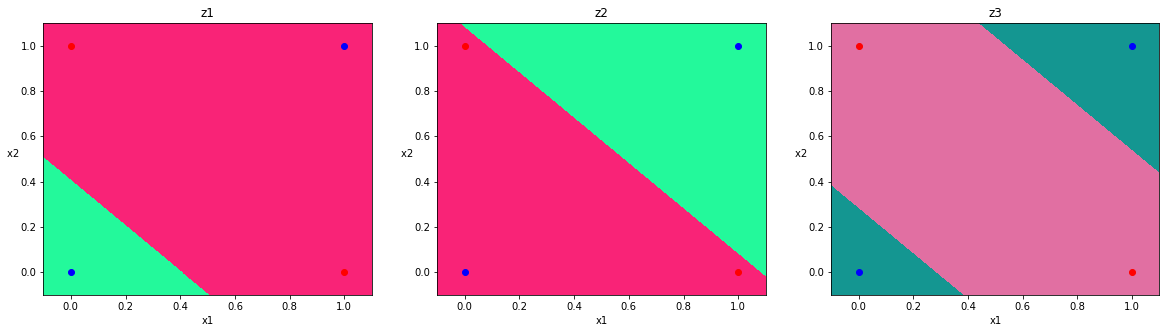

In [63]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,5))

# Se crean dos vectores con todos los posibles valores de entrada
max_axis = 1.1
min_axis = -0.1
axes = [min_axis, max_axis, min_axis, max_axis]
xx1, xx2 = np.meshgrid(
    np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
    np.linspace(axes[2], axes[3], 500).reshape(-1, 1),
)

# all_x1 y all_x2 son matrices de tamaño 500x500, se aplanan
X1_new = np.c_[xx1.ravel()]
X2_new = np.c_[xx2.ravel()]

# Se calculan las posibles salidas
z1 = w10 + w11*X1_new + w12*X2_new
sigma1 = sigmoid(z1)
z2 = w20 + w21*X1_new + w22*X2_new
sigma2 = sigmoid(z2)
all_z_predict = w30 + w31*sigma1 + w32*sigma2

# Si el valor predicho es mayor que 0.5 se considera la salida un 1, si no un 0
all_z_predict = (all_z_predict>0.5).astype(int)
z1 = (z1>0.5).astype(int)
z2 = (z2>0.5).astype(int)

# z_predict es un array de 250000x1, se redimensiona en forma de matriz de 500x500
all_z_predict = all_z_predict.reshape(xx1.shape)
z1 = z1.reshape(xx1.shape)
z2 = z2.reshape(xx1.shape)

# Se dibujan las salidas predichas por la red de todas las posibles entradas creadas
colormap1 = ListedColormap(['#23F99B', '#F92377'])
colormap2 = ListedColormap(['#149691', '#e16fa2'])
ax1.contourf(xx1, xx2, z1, cmap=colormap1)
ax2.contourf(xx1, xx2, z2, cmap=colormap1)
ax3.contourf(xx1, xx2, all_z_predict, cmap=colormap2)

# Se representan los cuatro puntos de la salida de la puerta lógica
ax1.scatter(x1[0], x2[0], c='blue')
ax1.scatter(x1[3], x2[3], c='blue')
ax1.scatter(x1[1:3], x2[1:3], c='red')
ax2.scatter(x1[0], x2[0], c='blue')
ax2.scatter(x1[3], x2[3], c='blue')
ax2.scatter(x1[1:3], x2[1:3], c='red')
ax3.scatter(x1[0], x2[0], c='blue')
ax3.scatter(x1[3], x2[3], c='blue')
ax3.scatter(x1[1:3], x2[1:3], c='red')

# Se termina de configurar la figura
ax1.set_xlabel('x1')
ax1.set_ylabel('x2  ', rotation=0)
ax1.set_title('z1')
ax2.set_xlabel('x1')
ax2.set_ylabel('x2  ', rotation=0)
ax2.set_title('z2')
ax3.set_xlabel('x1')
ax3.set_ylabel('x2  ', rotation=0)
ax3.set_title('z3')

In [64]:
from matplotlib.animation import FuncAnimation

# Creamos la gráfica inicial
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,5))
fig.set_tight_layout(True)
ax1.set_xlabel('x1')
ax1.set_ylabel('x2  ', rotation=0)
ax1.set_title('z1')
ax2.set_xlabel('x1')
ax2.set_ylabel('x2  ', rotation=0)
ax2.set_title('z2')
ax3.set_xlabel('x1')
ax3.set_ylabel('x2  ', rotation=0)
ax3.set_title('z3')

# Se dibujan los datos que persistiran en toda la evolución de la gráfica
ax1.scatter(x1[0], x2[0], c='blue')
ax1.scatter(x1[3], x2[3], c='blue')
ax1.scatter(x1[1:3], x2[1:3], c='red')
ax2.scatter(x1[0], x2[0], c='blue')
ax2.scatter(x1[3], x2[3], c='blue')
ax2.scatter(x1[1:3], x2[1:3], c='red')
ax3.scatter(x1[0], x2[0], c='blue')
ax3.scatter(x1[3], x2[3], c='blue')
ax3.scatter(x1[1:3], x2[1:3], c='red')

# Se dibuja el el fondo que irán cambiando durante el entrenamiento
max_axis = 1.1
min_axis = -0.1
axes = [min_axis, max_axis, min_axis, max_axis]
xx1, xx2 = np.meshgrid(
    np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
    np.linspace(axes[2], axes[3], 500).reshape(-1, 1),
)
X1_new = np.c_[xx1.ravel()]
X2_new = np.c_[xx2.ravel()]
all_z1_predict = w10 + w11*X1_new + w12*X2_new
all_sigmas1_predict = sigmoid(all_z1_predict)
all_z2_predict = w20 + w21*X1_new + w22*X2_new
all_sigmas2_predict = sigmoid(all_z2_predict)
all_z_predict = w30 + w31*all_sigmas1_predict + w32*all_sigmas2_predict


# Si el valor predicho es mayor que 0.5 se considera la salida un 1, si no un 0
all_z1_predict = (all_z1_predict>0.5).astype(int)
all_z2_predict = (all_z2_predict>0.5).astype(int)
all_z_predict = (all_z_predict>0.5).astype(int)

# z_predict es un array de 250000x1, se redimensiona en forma de matriz de 500x500
all_z1_predict = all_z1_predict.reshape(xx1.shape)
all_z2_predict = all_z2_predict.reshape(xx1.shape)
all_z_predict = all_z_predict.reshape(xx1.shape)

# Se dibujan las salidas predichas por la red de todas las posibles entradas creadas
colormap1 = ListedColormap(['#23F99B', '#F92377'])
colormap2 = ListedColormap(['#149691', '#e16fa2'])
fondo1 = ax1.contourf(xx1, xx2, all_z1_predict, cmap=colormap1)
fondo2 = ax2.contourf(xx1, xx2, all_z2_predict, cmap=colormap1)
fondo3 = ax3.contourf(xx1, xx2, all_z_predict, cmap=colormap2)

# Se dibuja un título
fontsize = 12
titulo = fig.suptitle(f'step: {0}', fontsize=fontsize)

# Se define la función que va a modificar la gráfica con la evolución del entrenamiento
def update(i):
    # Se actualiza el fondo
    all_z1_predict = Ws10[i] + Ws11[i]*X1_new + Ws12[i]*X2_new
    all_sigmas1_predict = sigmoid(all_z1_predict)
    all_z2_predict = Ws20[i] + Ws21[i]*X1_new + Ws22[i]*X2_new
    all_sigmas2_predict = sigmoid(all_z2_predict)
    all_z_predict = Ws30[i] + Ws31[i]*all_sigmas1_predict + Ws32[i]*all_sigmas2_predict

    all_z1_predict = (all_z1_predict>0.5).astype(int)
    all_z2_predict = (all_z2_predict>0.5).astype(int)
    all_z_predict = (all_z_predict>0.5).astype(int)

    all_z1_predict = all_z1_predict.reshape(xx1.shape)
    all_z2_predict = all_z2_predict.reshape(xx1.shape)
    all_z_predict = all_z_predict.reshape(xx1.shape)

    ax1.contourf(xx1, xx2, all_z1_predict, cmap=colormap1)
    ax2.contourf(xx1, xx2, all_z2_predict, cmap=colormap1)    
    ax3.contourf(xx1, xx2, all_z_predict, cmap=colormap2)

    ax1.scatter(x1[0], x2[0], c='blue')
    ax1.scatter(x1[3], x2[3], c='blue')
    ax1.scatter(x1[1:3], x2[1:3], c='red')
    ax2.scatter(x1[0], x2[0], c='blue')
    ax2.scatter(x1[3], x2[3], c='blue')
    ax2.scatter(x1[1:3], x2[1:3], c='red')
    ax3.scatter(x1[0], x2[0], c='blue')
    ax3.scatter(x1[3], x2[3], c='blue')
    ax3.scatter(x1[1:3], x2[1:3], c='red')

    # Se calcula el error
    z1 = Ws10[i] + Ws11[i]*x1 + Ws12[i]*x2
    sigma1 = sigmoid(z1)
    z2 = Ws20[i] + Ws21[i]*x1 + Ws22[i]*x2
    sigma2 = sigmoid(z2)
    z = Ws30[i] + Ws31[i]*sigma1 + Ws32[i]*sigma2
    error = loss(y, z)

    # Se actualiza el título
    titulo.set_text(f'step: {i}, error = {error:.7f}')

    return 0

# Se crea la animación con un refresco cada 200 ms
interval = 200 # ms
anim = FuncAnimation(fig, update, frames=np.arange(0, steps, 50), interval=interval)

# Se guarda en un GIF
gif_name = "GIFs/entrenamiento_red_funcion_activacion_XNOR.gif"
anim.save(gif_name, dpi=80, writer='imagemagick')
plt.close()

MovieWriter imagemagick unavailable; using Pillow instead.


![gif xnor funcion activacion](GIFs/entrenamiento_red_funcion_activacion_XNOR.gif)

Ahora si se consigue entrenar a la red con los mismos resultados que la puerta XNOR

Vamos a ver qué estamos haciendo exactamente. La salida depende de las entradas con la combinación de dos funciones sigmoide

$$z_1 = \omega_{10}+\omega_{11}x_1+\omega_{12}x_2$$
$$\sigma_1 = \frac{1}{1+e^{-z_1}} = \frac{1}{1+e^{-\omega_{10}-\omega_{11}x_1-\omega_{12}x_2}}$$
$$z_2 = \omega_{20}+\omega_{21}x_1+\omega_{22}x_2$$
$$\sigma_2 = \frac{1}{1+e^{-z_2}} = \frac{1}{1+e^{-\omega_{20}-\omega_{21}x_1-\omega_{22}x_2}}$$
$$z = \omega_{30}+\omega_{31}\sigma_1+\omega_{32}\sigma_2 = 
    \omega_{30}+\omega_{31}\frac{1}{1+e^{-\omega_{10}-\omega_{11}x_1-\omega_{12}x_2}}+\omega_{32}\frac{1}{1+e^{-\omega_{20}-\omega_{21}x_1-\omega_{22}x_2}}$$

Vamos a representar esto en una plano

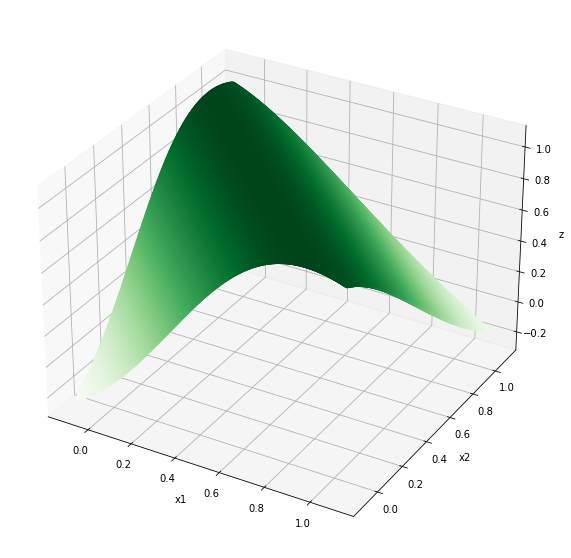

In [47]:
# Se crea la figura
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

# Se crean los datos para representar
posibles_x1 = np.linspace(-0.1, 1.1, 500)
posibles_x2 = np.linspace(-0.1, 1.1, 500)
XX1, XX2 = np.meshgrid(posibles_x1, posibles_x2)

# Se crean los datos para representar
ZZ1 = w10 + w11*XX1 + w12*XX2
ZZ2 = w20 + w21*XX1 + w22*XX2
SIGMA1 = 1/(1+np.exp(-ZZ1))
SIGMA2 = 1/(1+np.exp(-ZZ2))
ZZ = w30 + w31*SIGMA1 + w32*SIGMA2

# Se termina de configurar la figura
ax.contour3D(XX1, XX2, ZZ, 50, cmap='binary')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z')

# Se representa
ax.scatter3D(XX1, XX2, ZZ, c=ZZ, cmap='Greens')

Gracias a la función de activación hemos conseguido crear una red que a la salida tiene la forma anterior en función de X1 y X2, de manera que cuando z es mayor que 0,5 lo consideramos un 1 y cuando es menor que 0,5 lo consideramos un 0